---

Name: Divani Rafitya
- [Dataset](https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset/data)
- [Hugging Face](https://huggingface.co/spaces/divanirafitya/diabetes_prediction)

---

## Business Understanding

From the dataset taken from Kaggle, the dataset shows patients' medical history data from a hospital, such as age, gender, body mass index (BMI), hypertension, heart disease, smoking history, HbA1c levels, and blood glucose levels. As a data scientist, I am asked to identify patients who may be at risk of developing diabetes based on the patient's medical history to provide an appropriate treatment plan and minimize a condition where the patient may have diabetes despite negative test results.

Therefore, an objective is formed to be able to predict whether a patient is at risk of developing diabetes or not developing diabetes based on the patient's medical history, which will be useful for providing a treatment plan that suits each patient's condition.

Therefore, I created a machine learning model to be able to identify patients who may be at risk of developing diabetes. This machine learning model will compare several classification models to prevent overfitting, which are KNeighborsClassifier (KNN), Support Vector Machine (SVM), DecisionTreeClassifier, RandomForestClassifier, AdaBoostClassifier, and XGBClassifier to determine which model is the best because each model has unique strengths. By using all six models, it will helps us understand the data better and reduces dependence on just one model.

Metrics classification will use the Recall Score considering that False Negatives are important to minimize, where false positives are conditions when the patient may have diabetes (testing positive) despite negative test results. This aims to ensure that patients receive appropriate treatment to prevent future health risks.

## Import Libraries

In [1]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

# import feature engineering
from sklearn.model_selection import train_test_split
from feature_engine.outliers import Winsorizer
import phik
from imblearn.over_sampling import SMOTENC
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score

# import model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, recall_score

# import hyperparameter tuning
from sklearn.model_selection import GridSearchCV

# import warnings
import warnings
warnings.filterwarnings('ignore')

## Data Loading

In [2]:
# loading dataset from .csv file to pandas dataframe
df_ori = pd.read_csv('diabetes_prediction_dataset.csv')
pd.set_option('display.max_columns',None) #display all columns

In [3]:
# duplicate original dataset
df = df_ori.copy()

In [4]:
# show first 10 rows as sample
df.head(10)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
5,Female,20.0,0,0,never,27.32,6.6,85,0
6,Female,44.0,0,0,never,19.31,6.5,200,1
7,Female,79.0,0,0,No Info,23.86,5.7,85,0
8,Male,42.0,0,0,never,33.64,4.8,145,0
9,Female,32.0,0,0,never,27.32,5.0,100,0


In [5]:
# show last 10 rows as sample
df.tail(10)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
99990,Male,39.0,0,0,No Info,27.32,6.1,100,0
99991,Male,22.0,0,0,current,29.65,6.0,80,0
99992,Female,26.0,0,0,never,34.34,6.5,160,0
99993,Female,40.0,0,0,never,40.69,3.5,155,0
99994,Female,36.0,0,0,No Info,24.60,4.8,145,0
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0
99999,Female,57.0,0,0,current,22.43,6.6,90,0


In [6]:
# show dataframe summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


Based on the information provided, below are the details about each column:
- The dataset contains 4 numerical columns: 'age', 'bmi', 'HbA1c_level', and 'blood_glucose_level'.
- The dataset includes 4 categorical nominal columns: 'gender', 'hypertension', 'heart_disease', and 'diabetes', where the values do not have a specified order.
- The dataset features 1 categorical ordinal column: 'smoking_history', where the values have a specified order.

In [7]:
# check missing value in dataset
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [8]:
# check for duplications in dataset
df.duplicated().sum()

3854

Based on the information above, the insights obtained are as follows:
- This dataset consists of `9 columns` with a total of `100000 data entries`.
- There is a data type mismatch in the columns `'hypertension', 'heart_disease', and 'diabetes'` where the data type should be categorical/object because the values are encoded as 'Yes' or 'No'. However, the mismatch in data types in these columns does not need to be changed.
- There are no missing values ​​in the dataset.
- There are `3854 duplicate data` in the dataset.

For this reason, dropping duplicate data in data cleaning is necessary for data to be processed.

In [9]:
# drop data duplicates
df = df.drop_duplicates()

In [10]:
# check dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96146 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               96146 non-null  object 
 1   age                  96146 non-null  float64
 2   hypertension         96146 non-null  int64  
 3   heart_disease        96146 non-null  int64  
 4   smoking_history      96146 non-null  object 
 5   bmi                  96146 non-null  float64
 6   HbA1c_level          96146 non-null  float64
 7   blood_glucose_level  96146 non-null  int64  
 8   diabetes             96146 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 7.3+ MB


After dropping duplicates, the number of data entries becomes 96146 entries.

However, looking at 'smoking_history' column there is a value 'No Info'. This means that there is a missing value in the 'smoking_history' column.

In [11]:
# change value 'No Info' to Nan on column 'smoking_history'
df['smoking_history'] = df['smoking_history'].replace('No Info',np.nan)

In [12]:
# check missing value on dataset
df.isnull().sum()

gender                     0
age                        0
hypertension               0
heart_disease              0
smoking_history        32887
bmi                        0
HbA1c_level                0
blood_glucose_level        0
diabetes                   0
dtype: int64

In this case, missing value handling will be carried out at the feature engineering because I need to know what type of missing value to determine appropriate handling.

## Exploratory Data Analysis

### First, I want to see the distribution of the number of patients diagnosed with diabetes and without diabetes.

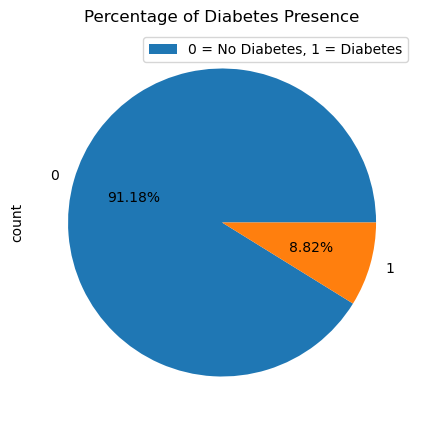

In [13]:
# data visualization
fig = plt.figure(figsize=(5,5))

df['diabetes'].value_counts().plot(kind='pie',autopct='%.2f%%')
plt.title('Percentage of Diabetes Presence')
plt.legend(labels=['0 = No Diabetes, 1 = Diabetes'])
plt.show()

Based on the image above, the insight obtained is that the difference between patients diagnosed with diabetes and without diabetes is very significant, with only 8.82% of the total patients having diabetes.

### Second, I want to see the distribution of the number of diabetes patients based on gender.

[Reference Link](https://www.google.com/url?sa=t&source=web&rct=j&opi=89978449&url=https://jik.stikesalifah.ac.id/index.php/jurnalkes/article/download/52/pdf%23:~:text%3DBaik%2520pria%2520maupun%2520wanita%2520memiliki,siklus%2520bulanan%2520(premenstrual%2520syindrome).&ved=2ahUKEwiB5vnh4oiHAxWdxzgGHUWBBRAQFnoECBUQAw&usg=AOvVaw2izrAFUt0Mwxt7dX1XrUkJ)

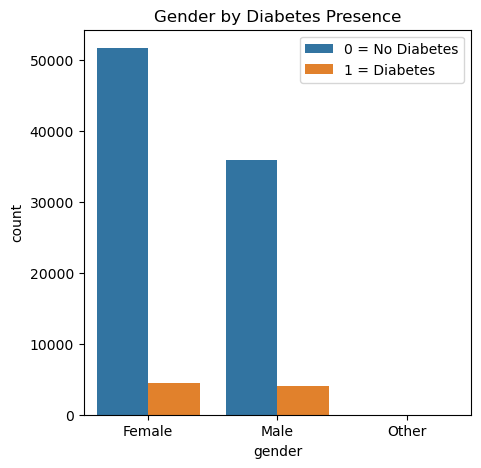

In [14]:
# data visualization
fig = plt.figure(figsize=(5,5))

sns.countplot(x='gender', hue='diabetes', data=df)
plt.title('Gender by Diabetes Presence')
plt.legend(labels=['0 = No Diabetes', '1 = Diabetes'])
plt.show()

Based on the picture above, the insight obtained is gender that dominates is Female for both patients with diabetes and without diabetes. This may indicate that the female gender has a greater risk of diabetes, which usually occurs after menopause due to hormonal changes.

### Third, I want to see the distribution of the number of diabetes patients based on the medical condition of hypertension.

[Reference Link](https://www.google.com/url?sa=t&source=web&rct=j&opi=89978449&url=https://www.halodoc.com/artikel/diabetes-bisa-sebabkan-hipertensi-apa-kaitannya&ved=2ahUKEwjiw_vC5YiHAxXZS2wGHSr5CZ4QFnoECC4QAQ&usg=AOvVaw0i0tmU8fapnqx5slveGi4A)

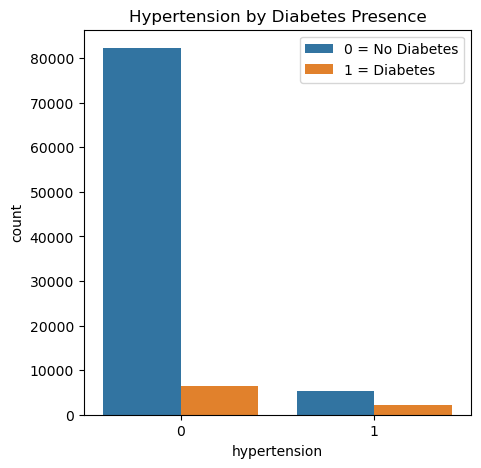

In [15]:
# data visualization
fig = plt.figure(figsize=(5,5))

sns.countplot(x='hypertension', hue='diabetes', data=df)
plt.title('Hypertension by Diabetes Presence')
plt.legend(labels=['0 = No Diabetes', '1 = Diabetes'])
plt.show()

Based on the picture above, the insight obtained is that less than half of the patients with hypertension have diabetes. This indicates that a patient can experience hypertension without having diabetes because hypertension occurs when blood pressure in the arteries continues to increase consistently. On the other hand, patients who have a history of diabetes tend to experience hypertension, which is caused by various factors such as genetics, unhealthy lifestyle, age, overweight or obesity, and environmental factors.

### Fourth, I want to see the distribution of the number of diabetes patients based on the medical condition of heart disease.

[Reference Link](https://www.google.com/url?sa=t&source=web&rct=j&opi=89978449&url=https://www.siloamhospitals.com/informasi-siloam/artikel/hubungan-diabetes-dengan-penyakit-jantung&ved=2ahUKEwioicfk5YiHAxV-SWwGHdlADTkQFnoECCIQAQ&usg=AOvVaw2mufWyKBepcT1SnYEs7p3W)

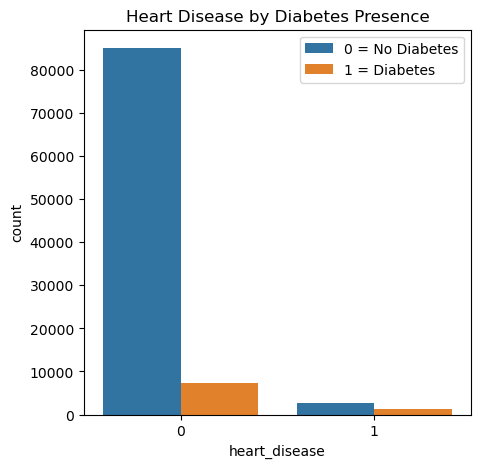

In [16]:
# data visualization
fig = plt.figure(figsize=(5,5))

sns.countplot(x='heart_disease', hue='diabetes', data=df)
plt.title('Heart Disease by Diabetes Presence')
plt.legend(labels=['0 = No Diabetes', '1 = Diabetes'])
plt.show()

Based on the image above, the insight obtained is that the majority of patients do not have a history of heart disease. This indicates that many patients with heart disease do not have diabetes. However, people with diabetes have a higher risk of developing heart disease compared to patients who do not have diabetes.

### Fifth, I want to see the distribution of diabetes patients based on smoking history.

[Reference Link](https://sehatnegeriku.kemkes.go.id/baca/blog/20240108/1244621/berhenti-merokok-kurangi-risiko-diabetes/)

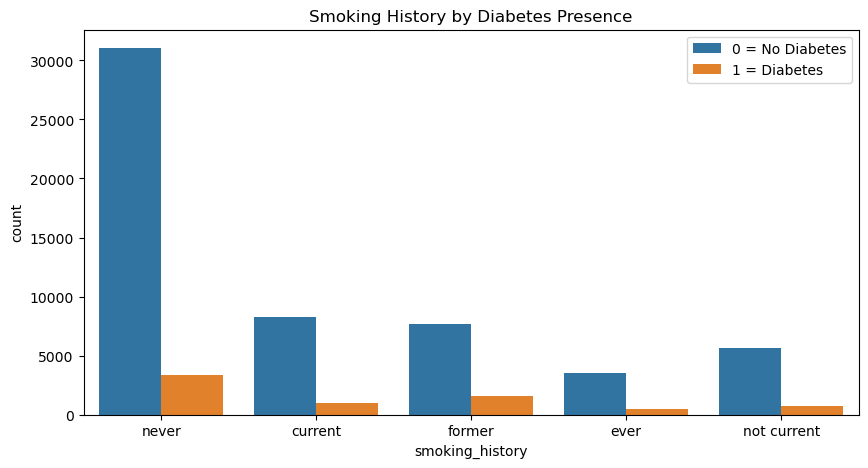

In [17]:
# data visualization
fig = plt.figure(figsize=(10,5))

sns.countplot(x='smoking_history', hue='diabetes', data=df)
plt.title('Smoking History by Diabetes Presence')
plt.legend(labels=['0 = No Diabetes', '1 = Diabetes'])
plt.show()

Based on the image above, the insight obtained is that the majority of patients are included in the category of never smoking based on patients smoking history. This indicates that the majority of patients do not have a high risk for diabetes. This is because smoking can increase a person's risk of diabetes. After all, it can cause the body to become less responsive to the insulin produced (insulin resistance), which will increase the risk of diabetes.

### Sixth, I want to see the distribution of diabetes patients based on body mass index (BMI).

[Reference Link](https://www.google.com/url?sa=t&source=web&rct=j&opi=89978449&url=https://www.siloamhospitals.com/en/informasi-siloam/artikel/cara-menghitung-bmi%23:~:text%3DKategori%2520BMI,-Setelah%2520mengetahui%2520cara%26text%3DAntara%252018%252C5%2520%252D%252024%252C,Di%2520atas%252030%2520berarti%2520obesitas&ved=2ahUKEwi1wL-11YiHAxXKxzgGHeXfAz4QFnoECCEQAw&usg=AOvVaw2eSflJIbDbY4xfJDSsr02Q)

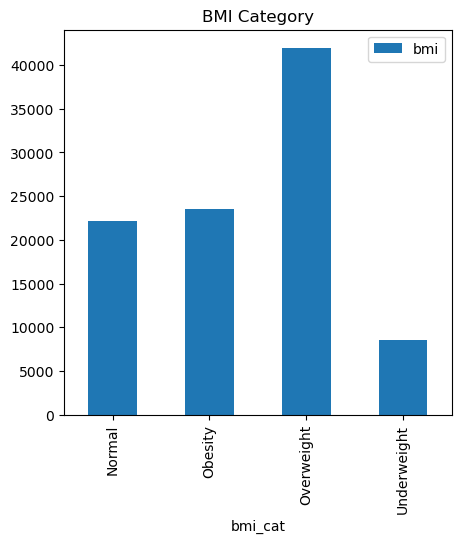

In [18]:
# create list to contain default value
lists = []

# create looping with for in
for i in df.bmi:
    bmi = float(i)
    if (bmi > 30):
        lists.append('Obesity')
    elif (25 <= bmi <= 30):
        lists.append('Overweight')
    elif (18.5 <= bmi < 25):
        lists.append('Normal')
    elif (bmi < 18.5):
        lists.append('Underweight')

# create new column
df['bmi_cat'] = lists

# data visualization
fig = plt.figure(figsize=(5,5))

df.groupby('bmi_cat')['bmi'].count().plot(kind='bar')
plt.title('BMI Category')
plt.legend()
plt.show()

Based on the image above, the insight obtained is that many patients are included in the Overweight and Obesity categories based on body mass index (BMI). This indicates that patients in these two categories are at high risk for diabetes because excessive body fat can interfere with the body's ability to use insulin effectively (insulin resistance), which will increase the risk of diabetes.

### Furthermore, I want to see the distribution of diabetes patients based on the patient's average blood sugar over the last 2-3 months ('HbA1c_level').

[Reference Link](https://www.google.com/url?sa=t&source=web&rct=j&opi=89978449&url=https://www.ncbi.nlm.nih.gov/books/NBK549816/%23:~:text%3DFor%2520an%2520HbA1c%2520test%2520to,HbA1c%2520of%25206.5%2525%2520or%2520higher.&ved=2ahUKEwiJ7PTH1oiHAxV-XmwGHcnWC40QFnoECBkQAw&usg=AOvVaw2E6gyFN7xuygJCOBhfBOCd)

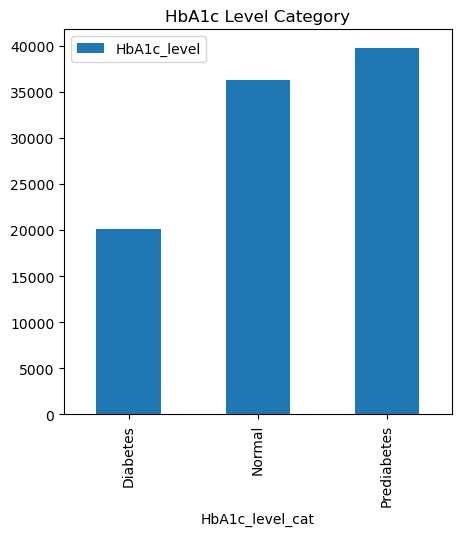

In [19]:
# create list to contain default value
lists = []

# create looping with for in
for i in df.HbA1c_level:
    HbA1c_level = float(i)
    if (HbA1c_level >= 6.5):
        lists.append('Diabetes')
    elif (5.7 <= HbA1c_level < 6.5):
        lists.append('Prediabetes')
    elif (HbA1c_level < 5.7):
        lists.append('Normal')

# create new column
df['HbA1c_level_cat'] = lists

# data visualization
fig = plt.figure(figsize=(5,5))

df.groupby('HbA1c_level_cat')['HbA1c_level'].count().plot(kind='bar')
plt.title('HbA1c Level Category')
plt.legend()
plt.show()

Based on the picture above, the insight obtained is that many patients are included in the prediabetes category based on the average blood sugar during the last 2-3 months of 5.7% - 6.4%, where this category has a high risk of diabetes. Although further examination by a doctor is needed, high HbA1c levels indicate a person has diabetes because it assesses long-term blood sugar control over the last 2-3 months.

### Lastly, I want to see the distribution of diabetes patients based on their blood sugar levels.

[Reference Link](https://www.google.com/url?sa=t&source=web&rct=j&opi=89978449&url=https://www.mayoclinic.org/diseases-conditions/diabetes/diagnosis-treatment/drc-20371451%23:~:text%3DA%2520fasting%2520blood%2520sugar%2520level,Glucose%2520tolerance%2520test.&ved=2ahUKEwix9Nq31YiHAxU21TgGHZOeB6YQFnoECBIQAw&usg=AOvVaw3pubSRthKQuCrdZr6uyn8D)

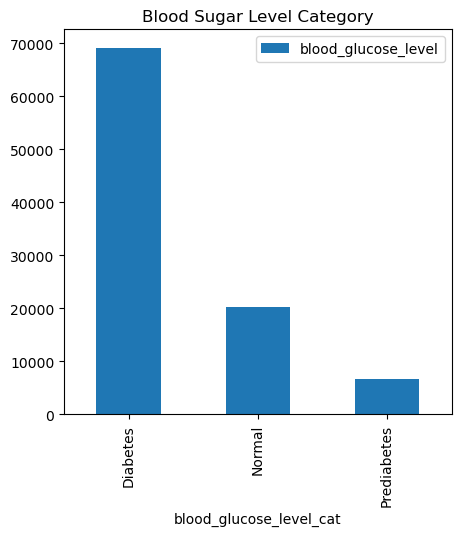

In [20]:
# create list to contain default value
lists = []

# create looping with for in
for i in df.blood_glucose_level:
    blood_glucose_level = float(i)
    if (blood_glucose_level > 125):
        lists.append('Diabetes')
    elif (100 <= blood_glucose_level <= 125):
        lists.append('Prediabetes')
    elif (blood_glucose_level < 100):
        lists.append('Normal')

# create new column
df['blood_glucose_level_cat'] = lists

# data visualization
fig = plt.figure(figsize=(5,5))

df.groupby('blood_glucose_level_cat')['blood_glucose_level'].count().plot(kind='bar')
plt.title('Blood Sugar Level Category')
plt.legend()
plt.show()

Based on the image above, the insight obtained is that many patients are included in the diabetes category based on their blood sugar levels, which are above 125mg/dL. Although further examination by a doctor is needed, high blood sugar usually indicates the main symptom of someone suffering from diabetes.

## Feature Engineering

Initially, I will drop the columns that have been created in EDA before carring out feature engineering 
because the new columns created in EDA are based on existing data in the dataset, thus the data is already represented.

In [21]:
# drop column
df.drop(['bmi_cat','HbA1c_level_cat','blood_glucose_level_cat'],axis= 1,inplace=True)

# check dataframe
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,NaN,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


### Split Feature as `x` and Target as `y`

In feature engineering, the first step that must be taken is to define the features and their targets/labels in the dataset.
- Feature: variables used to help make predictions.
- Target: the resulting value predicted by machine learning for the feature.

In this case, `the label is diabetes` because I want to predict whether the patient has no risk or may at risk of developing diabetes.

In [22]:
# split feature with target/label
X = df.drop('diabetes',axis=1) #feature
y = df['diabetes'] #label

# show first 5 rows from feature dataset
X.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
0,Female,80.0,0,1,never,25.19,6.6,140
1,Female,54.0,0,0,NaN,27.32,6.6,80
2,Male,28.0,0,0,never,27.32,5.7,158
3,Female,36.0,0,0,current,23.45,5.0,155
4,Male,76.0,1,1,current,20.14,4.8,155


### Split Train-set and Test-set

Next step is spliting data into two important parts in machine learning, namely train-set and test-set.
- The train-set will be used to train the machine learning model to learn patterns in existing data.
- The test-set will be used to test and evaluate machine learning results in making predictions on new data.

In [23]:
# splitting between train-set and test-set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 10)

print('X Train size : ', X_train.shape)
print('X Test size : ', X_test.shape)
print('y Train size : ', y_train.shape)
print('y Test size : ', y_test.shape)

X Train size :  (76916, 8)
X Test size :  (19230, 8)
y Train size :  (76916,)
y Test size :  (19230,)


In [24]:
# check first 5 rows from X_train dataset
X_train.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
64444,Male,8.0,0,0,never,27.32,6.1,85
94443,Female,42.0,0,0,never,44.97,5.7,90
78245,Female,53.0,1,0,current,27.32,6.1,155
6050,Female,19.0,0,0,NaN,23.83,6.1,158
39117,Female,44.0,0,0,NaN,27.32,6.6,155


In [25]:
# check first 5 rows from X_test dataset
X_test.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
27873,Female,48.0,0,0,current,23.43,4.0,200
20178,Female,64.0,0,1,former,27.32,6.0,200
21389,Female,18.0,0,0,never,44.26,4.8,140
82240,Female,67.0,0,0,current,37.90,3.5,155
31071,Female,8.0,0,0,NaN,21.11,6.6,100


### Handling Missing Value

During checking, if missing value is found in y_train or y_test, then handling missing value will be performed by removing the missing value. However, if the missing value is found in X_train or X_test, then I have to check the percentage of missing value first before handling.

In [26]:
# check missing values in train-set
X_train.isna().sum()

gender                     0
age                        0
hypertension               0
heart_disease              0
smoking_history        26372
bmi                        0
HbA1c_level                0
blood_glucose_level        0
dtype: int64

In [27]:
# check missing values in test-set
X_test.isna().sum()

gender                    0
age                       0
hypertension              0
heart_disease             0
smoking_history        6515
bmi                       0
HbA1c_level               0
blood_glucose_level       0
dtype: int64

In [28]:
# check missing values in train-set
y_train.isna().sum()

0

In [29]:
# check missing values in test-set
y_test.isna().sum()

0

In this case, the possibility of a missing value in the 'smoking_history' column of X_train is defined as `Missing Completely at Random (MCAR)`. This is because it's most likely that patients feel uncomfortable disclosing their 'smoking_history', leading them to intentionally leave that row blank.

According to the information in the data loading, the missing value are in 'smoking history' column, where the `missing value on X_train and X_test are 26372 and 6515, respectively`.
Because the missing values ​​in the dataset are more than 5%, handling missing values will be performed by imputation because a lot of data will be lost if removing all missing values, which is valuable.
For this reason, handling missing values ​​will be carried out using `imputation using mode` because the column is categorical which has the object data type.

In [30]:
# handling missing value with fillna
X_train['smoking_history'].fillna(X_train['smoking_history'].mode()[0], inplace=True)
X_test['smoking_history'].fillna(X_test['smoking_history'].mode()[0], inplace=True)

In [31]:
# check missing values in X_train and X_test
X_train.isna().sum()
X_test.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
dtype: int64

After handling missing value, checking missing value is done with `.isna()` instead of `.shape` because we are not dropping missing values.

### Handling Outliers

Because outlier handling is only performed on numerical columns, splitting data into numerical and categorical column is necessary.

In [32]:
# split numerical and categorical column
numerical = ['age','bmi','HbA1c_level','blood_glucose_level']
categorical = ['gender','smoking_history']
cat_encoded = ['hypertension','heart_disease']

print(f'Numerical columns   : {numerical}')
print(f'Categorical columns : {categorical,cat_encoded}')

Numerical columns   : ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']
Categorical columns : (['gender', 'smoking_history'], ['hypertension', 'heart_disease'])


The following are the skewness check and boxplot visualizations for each numerical column before handling outliers.

In [33]:
# check skewness before handling
skew_result = []
for i in numerical:
    skewness = df[i].skew()
    skew_result.append((i, skewness))

for i, skewness in skew_result:
    print(f"Skewness {i}: {skewness}")

Skewness age: -0.062444736060842554
Skewness bmi: 1.0237511657232292
Skewness HbA1c_level: -0.054463243946481645
Skewness blood_glucose_level: 0.83648926055032


{'whiskers': [<matplotlib.lines.Line2D at 0x1344ef350>,
 'caps': [<matplotlib.lines.Line2D at 0x133ee8710>,
 'boxes': [<matplotlib.lines.Line2D at 0x13445e590>,
 'medians': [<matplotlib.lines.Line2D at 0x133ee9810>,
 'fliers': [<matplotlib.lines.Line2D at 0x133eea090>,
 'means': []}

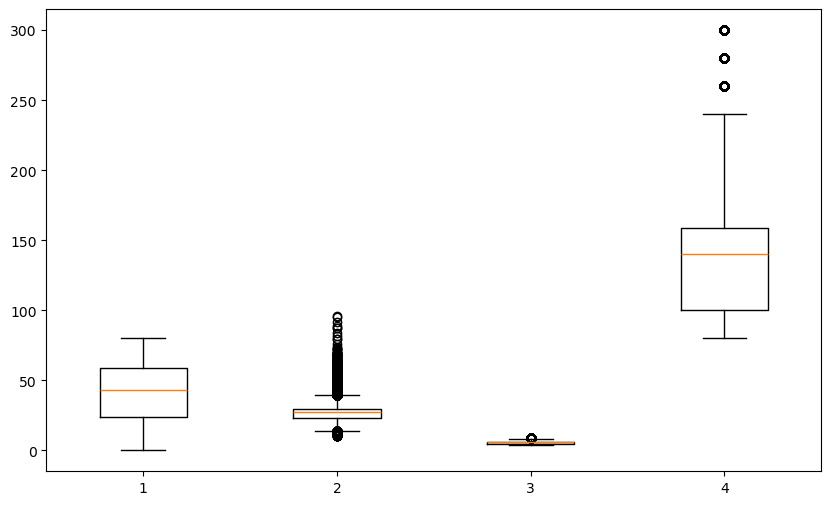

In [34]:
# show boxplot
plt.figure(figsize=(10, 6))
plt.boxplot(X_train[numerical].values)

Next, handling outlier will be carried out using the capping method for values ​​in both the normal distribution, moderate skewed distribution and extreme skewed distribution in X_train. The capping method was chosen because, in my opinion, was the most effective method because `the capping method does not delete outlier data but only presses the data by changing it to a reasonable value` thus I do not lose data, which are valuable.

In [35]:
# create list to contain default value
normal = []
moderate = []
extreme = []

# create looping with for in
for i in numerical:
    skew = X_train[i].skew() #to input i in list
    if -0.5 < skew and skew < 0.5:
        normal.append(i)
    elif -1 <= skew <= -0.5 or 0.5 <= skew <= 1:
        moderate.append(i)
    elif skew < 1 or skew > 1:
        extreme.append(i)

print(f"Normal distribution: {normal}")
print(f"Moderate distribution: {moderate}")
print(f"Extreme distribution: {extreme}")

Normal distribution: ['age', 'HbA1c_level']
Moderate distribution: ['blood_glucose_level']
Extreme distribution: ['bmi']


In [36]:
# capping normal distribution outliers
winsoriser_normal = Winsorizer(capping_method='gaussian',
                               tail='both',
                               fold=3,
                               variables=normal)

X_train = winsoriser_normal.fit_transform(X_train)

# capping moderate skewed distribution outliers
winsoriser_moderate = Winsorizer(capping_method='iqr',
                             tail='both',
                             fold=1.5, #moderate
                             variables=moderate)

X_train = winsoriser_moderate.fit_transform(X_train)

# capping extreme skewed distribution outliers
winsoriser_extreme = Winsorizer(capping_method='iqr',
                             tail='both',
                             fold=3, #extreme
                             variables=extreme)

X_train = winsoriser_extreme.fit_transform(X_train)

The following are the skewness check and boxplot visualizations for each numerical column after handling outliers with capping.

In [37]:
# check skewness after handling
skew_result = []
for i in numerical:
    skewness = X_train[i].skew()
    skew_result.append((i, skewness))

for i, skewness in skew_result:
    print(f"Skewness {i}: {skewness}")

Skewness age: -0.05832797236955468
Skewness bmi: 0.6939943975592755
Skewness HbA1c_level: -0.11039766296774345
Skewness blood_glucose_level: 0.43230614063761635


{'whiskers': [<matplotlib.lines.Line2D at 0x13442a9d0>,
 'caps': [<matplotlib.lines.Line2D at 0x13430d410>,
 'boxes': [<matplotlib.lines.Line2D at 0x134304f50>,
 'medians': [<matplotlib.lines.Line2D at 0x13430fb50>,
 'fliers': [<matplotlib.lines.Line2D at 0x13434b110>,
 'means': []}

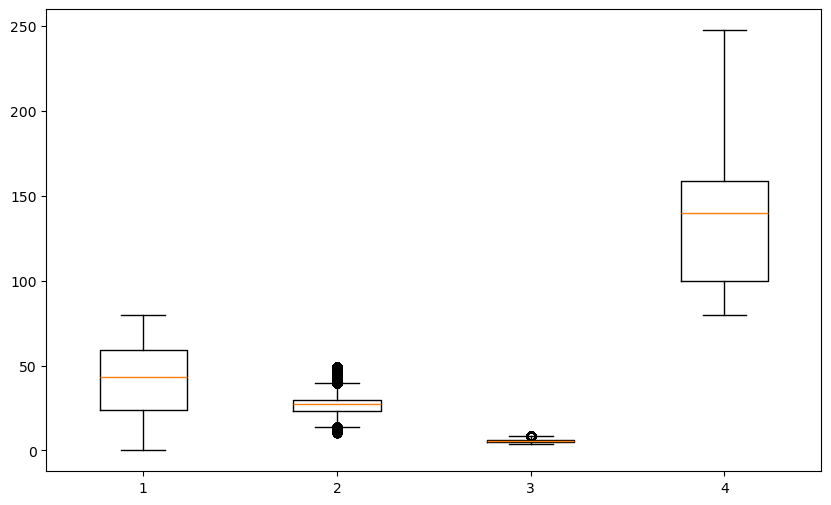

In [38]:
# show boxplot after capping
plt.figure(figsize=(10, 6))
plt.boxplot(X_train[numerical].values)

### Correlation for Feature Selection

The first step to perform feature selection is to check the correlation first.
To check the correlation, I use the phik library because it can process numerical and categorical data at the same time.

In [39]:
# merge label with feature using pd.concat
combined = pd.concat([X_train,y_train], axis=1)

In [40]:
# calculate correlation matrix with phik
phik_overview = combined.phik_matrix()
phik_overview['diabetes']

interval columns not set, guessing: ['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes']


gender                 0.021259
age                    0.363552
hypertension           0.305646
heart_disease          0.265917
smoking_history        0.091291
bmi                    0.284733
HbA1c_level            0.665494
blood_glucose_level    0.796200
diabetes               1.000000
Name: diabetes, dtype: float64

From the correlation matrix, results of each features with labels/targets have different values. In this case, I will choose the correlation value > 0.2, because the feature correlation below that is very weak with the label/target.

In [41]:
# choose correlation > 0.2
feature = ['age','hypertension','heart_disease','bmi','HbA1c_level','blood_glucose_level']

# feature selection from train-set and applied to test-set
X_train_feature = X_train[feature]
X_test_feature = X_test[feature]

The next step is grouping the feature selection results into numerical and categorical categories.

In [42]:
# split numerical and categorical column after feature selection
numerical = ['age','bmi','HbA1c_level','blood_glucose_level']
cat_encoded = ['hypertension','heart_disease']

print(f'Numerical columns   : {numerical}')
print(f'Categorical columns : {cat_encoded}')

Numerical columns   : ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']
Categorical columns : ['hypertension', 'heart_disease']


In [43]:
# split to numerical and categorical
X_train_num = X_train[numerical]
X_test_num = X_test[numerical]

X_train_cat = X_train[cat_encoded]
X_test_cat = X_test[cat_encoded]

In [44]:
# check numerical
X_train_num.head()

,age,bmi,HbA1c_level,blood_glucose_level
64444,8.0,27.32,6.1,85.0
94443,42.0,44.97,5.7,90.0
78245,53.0,27.32,6.1,155.0
6050,19.0,23.83,6.1,158.0
39117,44.0,27.32,6.6,155.0


In [45]:
# check categorical
X_train_cat.head()

,hypertension,heart_disease
64444,0,0
94443,0,0
78245,1,0
6050,0,0
39117,0,0


### Cardinality

Cardinality checking is carried out by looking at the unique values ​​in the categorical column. Then, reducing cardinality will be carried out if the cardinality value is above 12, which aims to get better predictions.

In [46]:
# check cardinality on categorical column
X_train_cat.nunique()

hypertension     2
heart_disease    2
dtype: int64

After checking the cardinality, the results show that there are no cardinality values ​​above 12, which means that there is no need to reduce cardinality in the categorical column. This is also because the categorical column results are Yes or No.

### Data Balancing

An imbalanced dataset can lead to model bias, where the model is more likely to predict the majority class. Data Balancing is the process of adjusting the distribution of different classes or categories within a dataset to reduce any significant imbalance, which will help mitigate this bias  to better generalization and prediction accuracy.

In [47]:
# show distribution on target
y.value_counts()

diabetes
0    87664
1     8482
Name: count, dtype: int64

In this case, there is a significant imbalance in the proportion of no diabetes and diabetes data (more than 60:40). Therefore, I will address this imbalance data using SMOTENS. Balancing the data is crucial to ensure that prediction results are not biased towards the dominant class in the training data, allowing machine learning models to effectively predict minority class data by equalizing their representation with the majority class. SMOTENS will randomly generate synthetic data for the minority class to achieve a balanced distribution in the target variable.

In [48]:
# oversampling with SMOTENC
smotenc = SMOTENC(categorical_features=['hypertension','heart_disease'],random_state = 40)
X_train_balanced, y_train_balanced = smotenc.fit_resample(X_train_feature, y_train)
y_train_balanced.value_counts()

diabetes
0    70152
1    70152
Name: count, dtype: int64

### Pipeline

Next, I will create a pipeline to combine several data preprocessing steps.
Given the different data distributions across numerical columns, scaling will involve using StandardScaler for columns with a normal distribution and MinMaxScaler for columns with moderate to extremely skewed distributions.
For encoding categorical nominal columns, OneHotEncoder will be used.

In [49]:
# scaling and encoding using columntransformer
num_normal = ['age','HbA1c_level']
num_skewed = ['bmi','blood_glucose_level']

preprocess = ColumnTransformer([
    ('standard_scaler', StandardScaler(), num_normal),
    ('minmax_scaler', MinMaxScaler(), num_skewed),
    ('encoder', OneHotEncoder(), cat_encoded)
],remainder='passthrough')

This machine learning model will compare several classification models to prevent overfitting, which are KNeighborsClassifier (KNN), Support Vector Machine (SVM), DecisionTreeClassifier, RandomForestClassifier, AdaBoostClassifier, and XGBClassifier to determine which model is the best because each model has unique strengths. The following are considerations for using the six models:
1. KNeighborsClassifier (KNN): calculates distances between data points and their nearest neighbors. KNN is used to identify patterns among patients who share similar medical history.
2. Support Vector Machine (SVM): SVM effectively handles complex data by using kernels to separate data and parameters like C and gamma to manage data imbalances. SVM is applied to distinguish patients who may at risk of diabetes and patient who has no risk of diabetes.
3. DecisionTreeClassifier: easy to interpret as its structure resembles human decision-making. It divides datasets into subsets based on branching rules. Each node represents a dataset feature, and branches represent different outcomes of the splits. However, this model may results overfitting if not properly tuned.
4. RandomForestClassifier: each model is built using several randomly sampled decision trees from the training data to enhance prediction accuracy and mitigate the risk of overfitting. Suitable for complex and unstructured data, particularly when the dataset has numerous features to prevent overfitting. 
5. AdaBoost: improves model performance by sequentially combining multiple weak models into a stronger one. Suitable for complex and unstructured data, especially when the target/label distribution in both the train-set and test-set is balanced.
6. XGBoost: improves model performance by sequentially combining multiple weak models into a stronger one. Suitable for complex and unstructured data, especially when the target/label distribution in both the train-set and test-set is imbalanced.  

In [50]:
# define model using pipeline
pipe_knn = make_pipeline(preprocess, KNeighborsClassifier())
pipe_svc = make_pipeline(preprocess, SVC())
pipe_dt = make_pipeline(preprocess, DecisionTreeClassifier(random_state=20))
pipe_rf = make_pipeline(preprocess, RandomForestClassifier(random_state=20))
pipe_ada = make_pipeline(preprocess, AdaBoostClassifier())
pipe_xg = make_pipeline(preprocess, XGBClassifier())

Cross-validation will be carried out to ensure consistency and accuracy by dividing the data into train set and a validation set to evaluate the model's performance, thereby mitigating overfitting. The primary objective of cross-validation is to obtain a more precise estimation of the model's performance on new data.

In this case, the chosen evaluation metric is recall score because the primary goal of this machine learning model is to minimize false negatives, which is a condition where the patient may have diabetes (testing positive) despite negative test results. Furthermore, it will be misleading if we use accuracy metric because of the imbalance data in `diabetes` variable.

In [51]:
# cross validation for each model
cv_knn = cross_val_score(pipe_knn,X_train_balanced,y_train_balanced,cv=5,scoring='recall',n_jobs=-1)
cv_svc = cross_val_score(pipe_svc,X_train_balanced,y_train_balanced,cv=5,scoring='recall',n_jobs=-1)
cv_dt = cross_val_score(pipe_dt,X_train_balanced,y_train_balanced,cv=5,scoring='recall',n_jobs=-1)
cv_rf = cross_val_score(pipe_rf,X_train_balanced,y_train_balanced,cv=5,scoring='recall',n_jobs=-1)
cv_ada = cross_val_score(pipe_ada,X_train_balanced,y_train_balanced,cv=5,scoring='recall',n_jobs=-1)
cv_xg = cross_val_score(pipe_xg,X_train_balanced,y_train_balanced,cv=5,scoring='recall',n_jobs=-1)

/usr/local/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
 

Searching the best model using a for in lopping.

In [52]:
# looping to find best model
models = []
cv_score = 0
for cv,name in zip([cv_knn,cv_svc,cv_dt,cv_rf,cv_ada,cv_xg],
                   ['knn','svc','dt','rf','ada','xg']):
  print(name)
  print(f'Recall - Cross Validation - All : {cv}')
  print(f'Recall - Cross Validation - Mean : {cv.mean()}') 
  print(f'Recall - Cross Validation - Std : {cv.std()}')
  print(f'Recall - Cross Validation - Range : {cv.mean()-cv.std()} - {cv.mean()+cv.std()}')
  print('-'*50)

  if cv.mean() > cv_score:
    cv_score = cv.mean()
    best_model = name
  else:
    pass

print(f'Best Model : {best_model}')
print(f'Cross Validation Mean From Best Model : {cv_score}')

knn
Recall - Cross Validation - All : [0.9383464  0.95744833 0.95445799 0.9534602  0.95709195]
Recall - Cross Validation - Mean : 0.952160970517731
Recall - Cross Validation - Std : 0.007072160102532248
Recall - Cross Validation - Range : 0.9450888104151988 - 0.9592331306202632
--------------------------------------------------
svc
Recall - Cross Validation - All : [0.91639344 0.92672844 0.92623477 0.92644858 0.92394868]
Recall - Cross Validation - Mean : 0.9239507814206126
Recall - Cross Validation - Std : 0.003906003828811204
Recall - Cross Validation - Range : 0.9200447775918014 - 0.9278567852494238
--------------------------------------------------
dt
Recall - Cross Validation - All : [0.86792587 0.99294369 0.99429834 0.99493978 0.99280114]
Recall - Cross Validation - Mean : 0.9685817642463921
Recall - Cross Validation - Std : 0.05033443584382802
Recall - Cross Validation - Range : 0.9182473284025641 - 1.01891620009022
--------------------------------------------------
rf
Recall - 

From the comparison results using cross validation, the best model is Random Forest Classifier with a mean value of 0.9725162687060974. Because the best model is the Random Forest Classifier, modeling and evaluation will carry out on model Random Forest Classifier.

## Modeling and Evaluation

For modeling and evaluation, I will predict the train set and test set using the selected best model, which is the Random Forest Classifier.

In [53]:
# baseline model using random forest
pipe_rf.fit(X_train_balanced, y_train_balanced)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('standard_scaler',
                                                  StandardScaler(),
                                                  ['age', 'HbA1c_level']),
                                                 ('minmax_scaler',
                                                  MinMaxScaler(),
                                                  ['bmi',
                                                   'blood_glucose_level']),
                                                 ('encoder', OneHotEncoder(),
                                                  ['hypertension',
                                                   'heart_disease'])])),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=20))])

Next, we will check the performance of the best model before hyperparameter tuning using confusion matrix.

Recall Score - Train Set  :  0.9975624358535751 

Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     70152
           1       1.00      1.00      1.00     70152

    accuracy                           1.00    140304
   macro avg       1.00      1.00      1.00    140304
weighted avg       1.00      1.00      1.00    140304
 

Confusion Matrix      : 


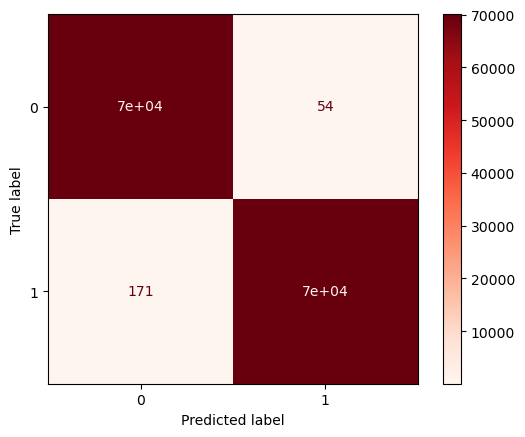

In [54]:
# check performance model against train-set
y_pred_train = pipe_rf.predict(X_train_balanced)

print('Recall Score - Train Set  : ', recall_score(y_train_balanced, y_pred_train), '\n')
print('Classification Report : \n', classification_report(y_train_balanced, y_pred_train), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(pipe_rf, X_train_balanced, y_train_balanced, cmap='Reds'))

Recall Score - Test Set   :  0.7415599534342259 

Classification Report : 
               precision    recall  f1-score   support

           0       0.97      0.98      0.98     17512
           1       0.77      0.74      0.75      1718

    accuracy                           0.96     19230
   macro avg       0.87      0.86      0.87     19230
weighted avg       0.96      0.96      0.96     19230
 

Confusion Matrix      : 


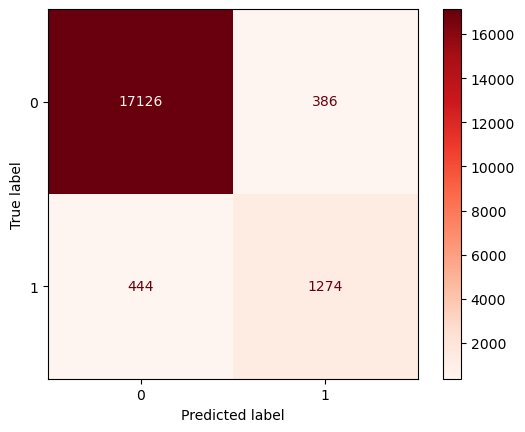

In [55]:
# check performance model against test-set
y_pred_test = pipe_rf.predict(X_test_feature)

print('Recall Score - Test Set   : ', recall_score(y_test, y_pred_test), '\n')
print('Classification Report : \n', classification_report(y_test, y_pred_test), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(pipe_rf, X_test_feature, y_test, cmap='Reds'))

In [56]:
# define confusion matrix
cm = confusion_matrix(y_test, y_pred_test)

# confusion matrix to extract False Positive
fp = cm[0][1]

# confusion matrix to extract False Negative
fn = cm[1][0]

In [57]:
# save classification report into a dictionary
all_reports = {}
def performance_report(all_reports, y_train_balanced, y_pred_train, y_test, y_pred_test, name):
  score_reports = {
      'train - recall_score' : recall_score(y_train_balanced, y_pred_train),
      'test - recall_score' : recall_score(y_test, y_pred_test),
      'test - false positive' : fp,
      'test - false negative' : fn
  }
  all_reports[name] = score_reports
  return all_reports

all_reports = performance_report(all_reports, y_train_balanced, y_pred_train, y_test, y_pred_test, 'Baseline (Default Hyperparameter)')
pd.DataFrame(all_reports)

,Baseline (Default Hyperparameter)
train - recall_score,0.997562
test - recall_score,0.741560
test - false positive,386.000000
test - false negative,444.000000


Based on the performance evaluation of Random Forest Classifier model, the results indicate that the `machine learning model tends to overfit`, as the recall score on the training set exceeds 80%, while the difference between training and testing is more than 5%.

### Hyperparameter Tuning: Grid Search

Hyperparameter tuning is the process of finding the optimal parameter combination for a machine learning model. In this case, I will use grid search technique for hyperparameter tuning to systematically evaluate all combinations of predefined parameters and determine the best combination for the model.

In [58]:
# define hyperparameters grid
criterion = ['gini']
max_depth = [35,36,45]
min_samples_split = [1,2,3,4,5]
min_samples_leaf = [1,2,3,4,5]

grid_search_params = {'randomforestclassifier__criterion': criterion,
                      'randomforestclassifier__max_depth': max_depth,
                      'randomforestclassifier__min_samples_split': min_samples_split,
                      'randomforestclassifier__min_samples_leaf': min_samples_leaf}
grid_search_params

{'randomforestclassifier__criterion': ['gini'],
 'randomforestclassifier__max_depth': [35, 36, 45],
 'randomforestclassifier__min_samples_split': [1, 2, 3, 4, 5],
 'randomforestclassifier__min_samples_leaf': [1, 2, 3, 4, 5]}

Next step is training using predetermined parameters with grid search by fitting 3 folds for each of 75 candidates, totaling 225 fits attempts.

In [59]:
# train with grid search
rf_gridcv = GridSearchCV(estimator=pipe_rf,
                         param_grid=grid_search_params,
                         cv=3,
                         n_jobs=-1,
                         scoring='recall')
rf_gridcv.fit(X_train_balanced, y_train_balanced)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('standard_scaler',
                                                                         StandardScaler(),
                                                                         ['age',
                                                                          'HbA1c_level']),
                                                                        ('minmax_scaler',
                                                                         MinMaxScaler(),
                                                                         ['bmi',
                                                                          'blood_glucose_level']),
                                                                        ('encoder',
                                                                         OneHotEncoder(),
                                                                         ['hypertension',
                                                                          'heart_disease'])])),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(random_state=20))]),
             n_jobs=-1,
             param_grid={'randomforestclassifier__criterion': ['gini'],
                         'randomforestclassifier__max_depth': [35, 36, 45],
                         'randomforestclassifier__min_samples_leaf': [1, 2, 3,
                                                                      4, 5],
                         'randomforestclassifier__min_samples_split': [1, 2, 3,
                                                                       4, 5]},
             scoring='recall')

In [60]:
# get best hyperparameters
rf_gridcv.best_params_

{'randomforestclassifier__criterion': 'gini',
 'randomforestclassifier__max_depth': 45,
 'randomforestclassifier__min_samples_leaf': 1,
 'randomforestclassifier__min_samples_split': 4}

From the results of carring out grid search for hyperparameter tuning, below are the best combination for model:
- criterion: 'gini'
- max_depth: 45
- min_samples_leaf': 1
- min_samples_split': 4

In [61]:
# get best estimator
rf_gridcv_best = rf_gridcv.best_estimator_

Next, we will examine the performance of the best model after hyperparameter tuning using confusion matrix.

Recall Score - Test Set   :  0.7415599534342259 

Classification Report : 
               precision    recall  f1-score   support

           0       0.97      0.98      0.98     17512
           1       0.77      0.74      0.75      1718

    accuracy                           0.96     19230
   macro avg       0.87      0.86      0.87     19230
weighted avg       0.96      0.96      0.96     19230
 

Confusion Matrix      : 


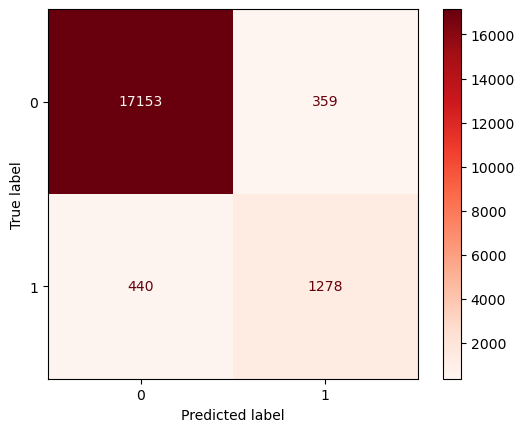

In [62]:
# check performance model against test-set
y_pred_test_tunning = rf_gridcv.best_estimator_.predict(X_test_feature)

print('Recall Score - Test Set   : ', recall_score(y_test, y_pred_test), '\n')
print('Classification Report : \n', classification_report(y_test, y_pred_test), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(rf_gridcv.best_estimator_, X_test_feature, y_test, cmap='Reds'))

In [63]:
# define confusion matrix
cm_tuning = confusion_matrix(y_test, y_pred_test_tunning)

# confusion matrix to extract false positive
fp = cm_tuning[0][1]

# confusion matrix to extract false negative
fn = cm_tuning[1][0]

In [64]:
# save classification report into a dictionary
all_reports = performance_report(all_reports, y_train_balanced, y_pred_train, y_test, y_pred_test_tunning, 'Grid Search')
pd.DataFrame(all_reports)

,Baseline (Default Hyperparameter),Grid Search
train - recall_score,0.997562,0.997562
test - recall_score,0.741560,0.743888
test - false positive,386.000000,359.000000
test - false negative,444.000000,440.000000


From the results of hyperparameter tuning using grid search on Random Forest, it showed improvements in test recall score and false negatives. 
`Despite the model still being considered overfitting, the increase in test recall score indicates improvement, as it successfully narrowed the gap to become more well-fitted`, with the difference between train and test recall scores reducing to 0.253674. 
Although the primary goal was to minimize false negatives, there was also a decrease in false positives. This reduction in false positives and false negatives also demonstrates improvement in the model after hyperparameter tuning with grid search, resulting in values of 359 and 440 respectively.

## Model Saving

Saving results of the best Random Forest Classifier model into the pkl file for inference and deployment purposes.

In [65]:
# save files
with open('rf_gridcv_best.pkl', 'wb') as file_1:
  pickle.dump(rf_gridcv_best, file_1)

## Model Inference

Model inference is the process of applying a mission learning model that has been created to predict data. The notebook file for the inference model is created separately in the notebook `P1M2_divani_rafitya_inf.ipynb` because this notebook contains confidential data.

## Conclusion

- The difference between patients diagnosed with diabetes and without diabetes is very significant, with only 8.82% of the total patients having diabetes.
- Gender that dominates is Female for both patients with diabetes and without diabetes. This may indicate that the female gender has a greater risk of diabetes, which usually occurs after menopause due to hormonal changes.
- Less than half of the patients with hypertension have diabetes. This indicates that a patient can experience hypertension without having diabetes because hypertension occurs when blood pressure in the arteries continues to increase consistently. On the other hand, patients who have a history of diabetes tend to experience hypertension, which is caused by various factors such as genetics, unhealthy lifestyle, age, overweight or obesity, and environmental factors.
- The majority of patients do not have a history of heart disease. This indicates that many patients with heart disease do not have diabetes. However, people with diabetes have a higher risk of developing heart disease compared to patients who do not have diabetes.
- The majority of patients are included in the category of never smoking based on patients smoking history. This indicates that the majority of patients do not have a high risk for diabetes. This is because smoking can increase a person's risk of diabetes. After all, it can cause the body to become less responsive to the insulin produced (insulin resistance), which will increase the risk of diabetes.
- Many patients are included in the Overweight and Obesity categories based on body mass index (BMI). This indicates that patients in these two categories are at high risk for diabetes because excessive body fat can interfere with the body's ability to use insulin effectively (insulin resistance), which will increase the risk of diabetes.
- Many patients are included in the prediabetes category based on the average blood sugar during the last 2-3 months of 5.7% - 6.4%, where this category has a high risk of diabetes. Although further examination by a doctor is needed, high HbA1c levels indicate a person has diabetes because it assesses long-term blood sugar control over the last 2-3 months.
- Many patients are included in the diabetes category based on their blood sugar levels, which are above 125mg/dL. Although further examination by a doctor is needed, high blood sugar usually indicates the main symptom of someone suffering from diabetes.

Based on the insight obtained from exploratory data analysis, it shows that many patients have risk factors for diabetes, such as being overweight or obese, having elevated HbA1c levels suggesting prediabetes, and a significant number diagnosed with diabetes based on blood sugar levels.
Thus, creating machine learning is necessary to predict patients at risk of developing diabetes based on their medical history, enabling the implementation of suitable treatment plans and minimizing a condition where patient may have diabetes (testing positive) despite negative test results.

Therefore, I created a machine learning model to be able to identify patients who may be at risk of developing diabetes. This machine learning model will compare six different classification models using cross validation to prevent overfitting and helps us understand the data better and reduces dependence on just one model. From the comparison results using cross validation, the best model is Random Forest Classifier with a mean value of 0.9725162687060974.

Based on the performance evaluation of Random Forest Classifier model, the results indicate that the `machine learning model tends to overfit`, as the recall score on the training set exceeds 80%, while the difference between training and testing is more than 5%. Furthermore, I use grid search technique for hyperparameter tuning to systematically evaluate all combinations of predefined parameters and determine the best combination for the model.

From the results of hyperparameter tuning using grid search on Random Forest, it showed improvements in test recall score and false negatives. `Despite the model still being considered overfitting, the increase in test recall score indicates improvement, as it successfully narrowed the gap to become more well-fitted`, with the difference between train and test recall scores reducing to 0.253674. 
Although the primary goal was to minimize false negatives, there was also a decrease in false positives. This reduction in false positives and false negatives also demonstrates improvement in the model after hyperparameter tuning with grid search, resulting in values of 359 and 440 respectively.

Advantages of the machine learning model developed are as followed:
- There was improvement post-tuning as the test recall score increased, thereby reducing the gap between train and test results.
- Post-tuning improvements are shown with a decrease in false negative predictions.
- Despite the goals is to minimize false negatives, there was also a reduction in false positive predictions.
- GridSearch was utilized for hyperparameter tuning to optimize modeling and training by testing all combinations with predefined parameters to determine the best model configuration.

Disadvantages of the model include:
- The model still considered overfitting, as despite narrowing the gap, the difference between train and test results remains above 5%, approximately 20%.
- The use of GridSearch for hyperparameter tuning may cause the model to be overly adjusted to the validation set, potentially not reflecting true performance on new data.

Therefore, to improve the optimization of machine learning evaluations, the following steps can be taken:
- Improvement on feature engineering: implement outlier handling by trimming data to reduce the percentage of outliers to below 5%. This may decrease the dataset size for training but is expected to improve the gap between train-set and test-set results to achieve a good fit and minimize prediction errors.
- Improvement on hyperparameter tuning: expand the range in hyperparameter tuning to achieve a test recall score of 0.8 and reduce false negatives to 200, aiming for a good fit and enhanced prediction accuracy.
- Improvement on hyperparameter tuning: experiment with random search for hyperparameter tuning and compare both GridSearch and RandomSearch results to determine which method better mitigates overfitting.

Here is the analysis of the weaknesses found in the machine learning model's predictions, which will be useful for improving the model and conducting further analysis for decision-making purposes.

In [66]:
# create new column
evaluation = X_test.copy() #create duplicate 
evaluation['label'] = y_test
evaluation['prediction'] = y_pred_test_tunning

# devide evaluation data based on prediction and label
fn_eval = evaluation[(evaluation['label'] == 1) & (evaluation['prediction'] == 0)]
fp_eval = evaluation[(evaluation['label'] == 0) & (evaluation['prediction'] == 1)]

# statistics for each subset from raw data
data_num = ['age','bmi','HbA1c_level','blood_glucose_level']
data_cat = ['gender','hypertension','heart_disease','smoking_history']
fn_stats = fn_eval[data_num].describe().loc[['mean','50%','min','max']]
fp_stats = fp_eval[data_num].describe().loc[['mean','50%','min','max']]
fn_mode = fn_eval[data_cat].mode().iloc[0]
fp_mode = fp_eval[data_cat].mode().iloc[0]

print(f'\nMean for False Negative: \n{fn_stats}')
print(f'\nMean for False Positive: \n{fp_stats}')
print(f'\nMode for False Negative: \n{fn_mode}')
print(f'\nMode for False Positive: \n{fp_mode}')


Mean for False Negative: 
            age        bmi  HbA1c_level  blood_glucose_level
mean  58.584091  31.098727     6.082955           150.768182
50%   59.000000  28.510000     6.100000           155.000000
min   15.000000  19.330000     5.700000           126.000000
max   80.000000  66.880000     6.600000           200.000000

Mean for False Positive: 
            age        bmi  HbA1c_level  blood_glucose_level
mean  66.036212  33.055153     6.112813           151.802228
50%   68.000000  30.560000     6.100000           145.000000
min   29.000000  17.180000     5.700000           126.000000
max   80.000000  65.910000     6.600000           200.000000

Mode for False Negative: 
gender             Female
hypertension            0
heart_disease           0
smoking_history     never
Name: 0, dtype: object

Mode for False Positive: 
gender             Female
hypertension            0
heart_disease           0
smoking_history     never
Name: 0, dtype: object


Based on the evaluation conducted, the machine learning model that I have developed still exhibits weaknesses in predicting the patient's condition based on the following medical history. This indicates the possibility of errors in predicting whether the patient is at risk of diabetes or not.
- Gender: Female
- Age: 58
- Hypertension: No
- Heart Disease: No
- Smoking History: Never
- BMI: 31.09
- HbA1c Level: 6.08
- Blood Sugar Level: 150.77

If a patient's medical condition meets the mentioned criteria, there is a possibility that patient may have diabetes (testing positive) despite negative test results. Thus, `the business solution is to recommend further examination by a doctor after predicting with machine learning.`

## Conceptual Problems

1. Bootstrap Aggregating (Bagging) is an ensemble learning method developed to mitigate overfitting by utilizing variations from multiple different subsets of data. It starts by randomly sampling with replacement from the training data, allowing each sample to be selected more than once or not at all. This process creates several diverse subsets from the training data. Each subset is then independently and in parallel used to train multiple machine learning models. After training, predictions from each model are combined using majority voting (for classification) or averaging (for regression) to generate a final prediction that is more stable and accurate.
Random Forest is a popular example of a bagging algorithm, where each model is built using several randomly sampled decision trees from the training data to enhance prediction accuracy and mitigate the risk of overfitting.

2. Boosting is a machine learning technique that improves model performance by sequentially combining multiple weak models into a stronger one. It starts by building the first model and evaluating its performance on the training data. Each subsequent model focuses on correcting the errors of the previous model, assigning higher weights to more challenging data points. This repetitive process enhances overall performance, and predictions from all models are combined to generate a more accurate final prediction.
AdaBoost and XGBoost are popular examples of boosting algorithms used to tackle complex and diverse data. Their key difference lies in the distribution of labels in the dataset. AdaBoost is suitable when the label distribution in both the train-set and test-set is balanced. On the other hand, XGBoost is more appropriate for datasets where the label distribution is imbalanced.

Here are the differences in how Random Forest works with XGBoost:
- Random Forest: utilizes the bagging approach by training multiple decision trees in parallel to mitigate overfitting. It combines many independent decision trees and aggregates predictions by selecting the most common result or averaging predictions. Each tree is built using a random subset of the training data. Random Forest is suitable for complex and unstructured data, particularly when the dataset has numerous features to prevent overfitting.
- XGBoost: implements the boosting approach by sequentially training weak learners (typically shallow decision trees) to correct errors in the training data. It focuses on learning from errors first to gradually improve prediction accuracy. XGBoost is also suitable for complex and unstructured data, especially when the distribution of the target/label data is imbalanced.

3. Cross-validation is a crucial method in machine learning for assessing how well a model can predict new data. It involves dividing the dataset into training and validation sets using multiple folds (cv), which helps prevent overfitting and provides a more accurate evaluation of the model's generalization ability. This process ensures that the model not only performs well on training data but also results in reliable predictions for new data, thus it can identifying potential issues of overfitting or underfitting. Overall, cross-validation enhances the robustness and reliability of machine learning models in practical applications.